In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress
# import sqlalchemy
# from sqlalchemy import create_engine, func
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session

# NOT UPLOADED TO GITHUB
# from config import PASSWORD, USERNAME, DATABASE_NAME, ENDPOINT

In [2]:
# engine = create_engine(f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DATABASE_NAME}')
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Base.classes.keys()


In [3]:
# #Assigning tables to variables
# listings = Base.classes.listings
# calendar = Base.classes.calendar
# reviews = Base.classes.reviews

In [4]:
# session = Session(engine)
# listings_id = session.query(listings.id)

# sql_query_listings = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM listings_clean
#                                ''', engine)




In [5]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [6]:
# df_list = pd.DataFrame(sql_query_listings, columns = sql_query_listings.keys())
# df_list = df_list.rename(columns={'id': 'listing_id'})
# df_list.head()

In [7]:
# sql_query_calendar = pd.read_sql_query ('''
#                                SELECT
#                                *
#                                FROM calendar_clean
#                                ''', engine)

# df_cal = pd.DataFrame(sql_query_calendar, columns = sql_query_calendar.keys())
# df_cal.head()

In [8]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [9]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [10]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [11]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [12]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [13]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [14]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [15]:
df.price.min()

20.0

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

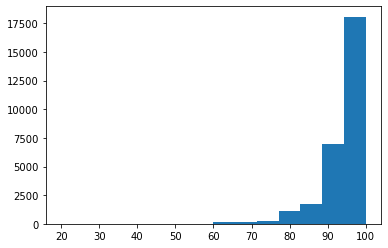

In [16]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

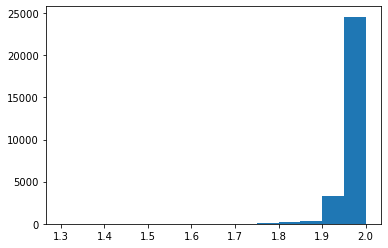

In [17]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [18]:
# df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

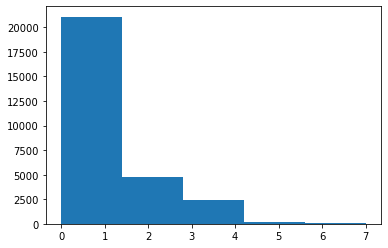

In [19]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

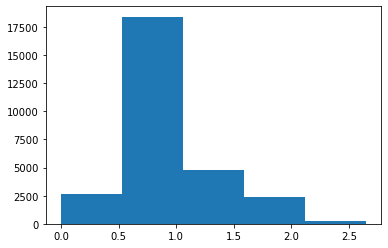

In [20]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [21]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

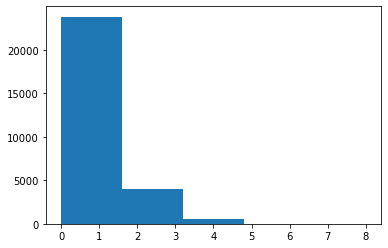

In [22]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

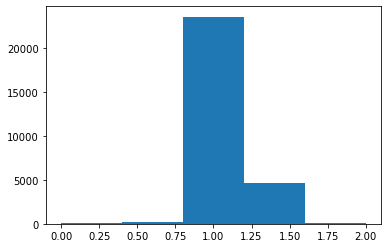

In [23]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [24]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

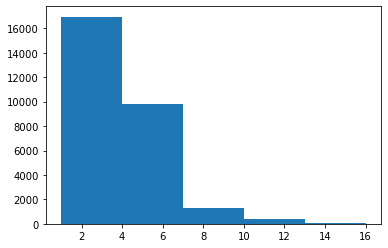

In [25]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

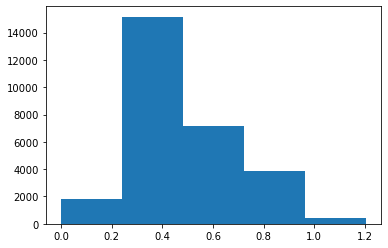

In [26]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [27]:
df['accommodates']=df['accommodates'].apply(np.log10)

(array([2.753e+04, 6.620e+02, 1.990e+02, 2.600e+01, 2.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

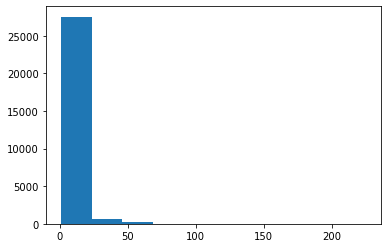

In [28]:
plt.hist(df.beds.apply(lambda x: pow(x,2)), bins =10)

In [29]:
# df.beds = df.beds.apply(lambda x: pow(x,2))

In [30]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

C:\Users\wells\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [32]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X = df.drop(columns=['price'])
y = df['price']

In [34]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [35]:
X.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'review_scores_rating', 'city_Ballard, Seattle',
       'city_Phinney Ridge Seattle', 'city_Seattle', 'city_Seattle ',
       'city_West Seattle', 'city_西雅图', 'zipcode_98101', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98104', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98121', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98199', 'zipcode_99\r\n98122', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
X_train_scaled.shape

(21339, 53)

In [39]:
type(X_train_scaled)

numpy.ndarray

In [40]:
X_train_scaled.shape

(21339, 53)

In [41]:
X_train_scaled

array([[ 0.90387745,  0.56366687, -0.68966397, ..., -0.29081667,
        -0.29898405, -0.29870494],
       [ 0.93977133,  0.28605373,  1.35046506, ..., -0.29081667,
        -0.29898405,  3.34778522],
       [ 2.04880499, -0.11042112, -0.68966397, ..., -0.29081667,
        -0.29898405, -0.29870494],
       ...,
       [-0.29695559,  0.78686581, -0.68966397, ..., -0.29081667,
        -0.29898405, -0.29870494],
       [ 1.53490928, -0.73581935,  0.06328695, ..., -0.29081667,
        -0.29898405, -0.29870494],
       [ 0.979692  ,  0.24758554,  0.06328695, ..., -0.29081667,
        -0.29898405, -0.29870494]])

In [42]:
y_train

5801      70.000000
2786     172.129032
24609     78.275862
7588      75.000000
14600     35.000000
            ...    
19928     59.724138
20054     58.000000
6535      75.368421
15269    109.000000
2970      99.500000
Name: price, Length: 21339, dtype: float64

In [43]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 37,251
Trainable params: 37,251
Non-trainable params: 0
_________________________________________________________________


In [44]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
model.compile(optimizer='adam',loss='mse')

In [46]:
history = model.fit(X_train_scaled, y_train, epochs=500, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/500
667/667 [==============================] - 5s 4ms/step - loss: 5599.4375 - val_loss: 4641.8662
Epoch 2/500
667/667 [==============================] - 2s 3ms/step - loss: 3626.9421 - val_loss: 4489.6689
Epoch 3/500
667/667 [==============================] - 2s 3ms/step - loss: 3538.0125 - val_loss: 4251.6738
Epoch 4/500
667/667 [==============================] - 2s 3ms/step - loss: 3392.9087 - val_loss: 4301.4893
Epoch 5/500
667/667 [==============================] - 2s 3ms/step - loss: 3312.5398 - val_loss: 4144.4111
Epoch 6/500
667/667 [==============================] - 2s 3ms/step - loss: 3230.4956 - val_loss: 4070.7488
Epoch 7/500
667/667 [==============================] - 2s 3ms/step - loss: 3139.9509 - val_loss: 3993.6509
Epoch 8/500
667/667 [==============================] - 2s 3ms/step - loss: 3045.8958 - val_loss: 3783.7212
Epoch 9/500
667/667 [==============================] - 2s 3ms/step - loss: 2949.0566 - val_loss: 3868.5510
Epoch 10/500
667/667 [===============

667/667 [==============================] - 1s 2ms/step - loss: 663.6053 - val_loss: 1538.1357
Epoch 78/500
667/667 [==============================] - 1s 2ms/step - loss: 688.5917 - val_loss: 1395.6956
Epoch 79/500
667/667 [==============================] - 1s 2ms/step - loss: 663.8428 - val_loss: 1235.1622
Epoch 80/500
667/667 [==============================] - 1s 2ms/step - loss: 626.7253 - val_loss: 1181.3412
Epoch 81/500
667/667 [==============================] - 1s 2ms/step - loss: 621.8661 - val_loss: 1379.2893
Epoch 82/500
667/667 [==============================] - 1s 2ms/step - loss: 618.5386 - val_loss: 1251.9508
Epoch 83/500
667/667 [==============================] - 1s 1ms/step - loss: 652.8604 - val_loss: 1390.6061
Epoch 84/500
667/667 [==============================] - 1s 2ms/step - loss: 645.5928 - val_loss: 1218.5778
Epoch 85/500
667/667 [==============================] - 1s 2ms/step - loss: 591.9798 - val_loss: 1347.2983
Epoch 86/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 331.0562 - val_loss: 915.9443
Epoch 154/500
667/667 [==============================] - 1s 1ms/step - loss: 372.8512 - val_loss: 946.9874
Epoch 155/500
667/667 [==============================] - 1s 1ms/step - loss: 385.5213 - val_loss: 1061.1647
Epoch 156/500
667/667 [==============================] - 1s 2ms/step - loss: 313.4793 - val_loss: 835.7397
Epoch 157/500
667/667 [==============================] - 1s 1ms/step - loss: 313.8885 - val_loss: 889.1959
Epoch 158/500
667/667 [==============================] - 1s 1ms/step - loss: 315.8231 - val_loss: 876.4359
Epoch 159/500
667/667 [==============================] - 1s 2ms/step - loss: 323.3599 - val_loss: 962.8199
Epoch 160/500
667/667 [==============================] - 1s 2ms/step - loss: 351.7709 - val_loss: 861.7914
Epoch 161/500
667/667 [==============================] - 1s 2ms/step - loss: 317.8344 - val_loss: 851.6033
Epoch 162/500
667/667 [===========================

667/667 [==============================] - 1s 1ms/step - loss: 233.6947 - val_loss: 752.7749
Epoch 230/500
667/667 [==============================] - 1s 1ms/step - loss: 238.9996 - val_loss: 762.0542
Epoch 231/500
667/667 [==============================] - 1s 1ms/step - loss: 228.9478 - val_loss: 829.0173
Epoch 232/500
667/667 [==============================] - 1s 1ms/step - loss: 245.2661 - val_loss: 833.2707
Epoch 233/500
667/667 [==============================] - 1s 1ms/step - loss: 228.9955 - val_loss: 816.5056
Epoch 234/500
667/667 [==============================] - 1s 1ms/step - loss: 225.4734 - val_loss: 813.3136
Epoch 235/500
667/667 [==============================] - 1s 1ms/step - loss: 231.0388 - val_loss: 778.7590
Epoch 236/500
667/667 [==============================] - 1s 1ms/step - loss: 213.7965 - val_loss: 758.6740
Epoch 237/500
667/667 [==============================] - 1s 1ms/step - loss: 215.3977 - val_loss: 773.6495
Epoch 238/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 194.5701 - val_loss: 729.0773
Epoch 306/500
667/667 [==============================] - 1s 1ms/step - loss: 180.1697 - val_loss: 685.7919
Epoch 307/500
667/667 [==============================] - 1s 1ms/step - loss: 162.8940 - val_loss: 703.2877
Epoch 308/500
667/667 [==============================] - 1s 1ms/step - loss: 189.7186 - val_loss: 718.9185
Epoch 309/500
667/667 [==============================] - 1s 1ms/step - loss: 179.1361 - val_loss: 717.4449
Epoch 310/500
667/667 [==============================] - 1s 1ms/step - loss: 165.6679 - val_loss: 702.4936
Epoch 311/500
667/667 [==============================] - 1s 1ms/step - loss: 175.1005 - val_loss: 721.9899
Epoch 312/500
667/667 [==============================] - 1s 1ms/step - loss: 173.1404 - val_loss: 737.3312
Epoch 313/500
667/667 [==============================] - 1s 1ms/step - loss: 184.5573 - val_loss: 685.9169
Epoch 314/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 136.0293 - val_loss: 687.9490
Epoch 382/500
667/667 [==============================] - 1s 1ms/step - loss: 138.2877 - val_loss: 674.7610
Epoch 383/500
667/667 [==============================] - 1s 1ms/step - loss: 142.8221 - val_loss: 669.3933
Epoch 384/500
667/667 [==============================] - 1s 1ms/step - loss: 140.8459 - val_loss: 692.7095
Epoch 385/500
667/667 [==============================] - 1s 1ms/step - loss: 155.4599 - val_loss: 651.7520
Epoch 386/500
667/667 [==============================] - 1s 1ms/step - loss: 132.2791 - val_loss: 649.0524
Epoch 387/500
667/667 [==============================] - 1s 1ms/step - loss: 138.6244 - val_loss: 656.4141
Epoch 388/500
667/667 [==============================] - 1s 1ms/step - loss: 135.1656 - val_loss: 676.0359
Epoch 389/500
667/667 [==============================] - 1s 1ms/step - loss: 134.4946 - val_loss: 659.1676
Epoch 390/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 119.9262 - val_loss: 647.8997
Epoch 458/500
667/667 [==============================] - 1s 2ms/step - loss: 115.6174 - val_loss: 684.4011
Epoch 459/500
667/667 [==============================] - 1s 2ms/step - loss: 108.2440 - val_loss: 650.8555
Epoch 460/500
667/667 [==============================] - 1s 2ms/step - loss: 140.9782 - val_loss: 657.5757
Epoch 461/500
667/667 [==============================] - 1s 1ms/step - loss: 112.1963 - val_loss: 641.2708
Epoch 462/500
667/667 [==============================] - 1s 1ms/step - loss: 103.7683 - val_loss: 638.7515
Epoch 463/500
667/667 [==============================] - 1s 1ms/step - loss: 111.3734 - val_loss: 617.4091
Epoch 464/500
667/667 [==============================] - 1s 1ms/step - loss: 124.8054 - val_loss: 692.6403
Epoch 465/500
667/667 [==============================] - 1s 1ms/step - loss: 127.4264 - val_loss: 652.4440
Epoch 466/500
667/667 [============================

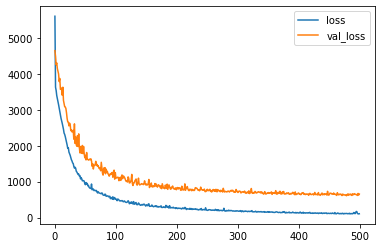

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [48]:
model.save('model.hdf5')
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 729us/step


Text(0.5, 0, 'predicted price')

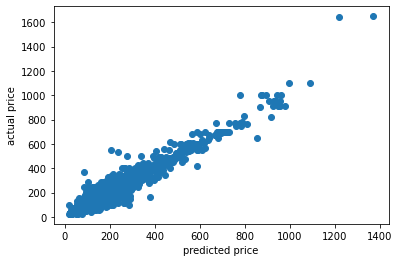

In [49]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [50]:
y_pred.tolist()

[[207.82757568359375],
 [89.75640106201172],
 [58.89935302734375],
 [82.69596099853516],
 [67.10446166992188],
 [47.29738235473633],
 [205.10826110839844],
 [150.8391876220703],
 [61.23247146606445],
 [190.66552734375],
 [30.325265884399414],
 [95.21318054199219],
 [118.8875961303711],
 [64.84940338134766],
 [277.7421875],
 [61.15930938720703],
 [103.21441650390625],
 [175.27828979492188],
 [231.06185913085938],
 [80.07170104980469],
 [238.09222412109375],
 [95.23816680908203],
 [237.5610809326172],
 [168.0313262939453],
 [166.71432495117188],
 [77.94715881347656],
 [151.60533142089844],
 [106.32218170166016],
 [100.89344787597656],
 [93.22980499267578],
 [97.10785675048828],
 [61.680931091308594],
 [78.6666259765625],
 [39.17399978637695],
 [109.17689514160156],
 [296.91064453125],
 [54.0579948425293],
 [252.78125],
 [141.635009765625],
 [232.9054718017578],
 [123.95684814453125],
 [73.60177612304688],
 [113.6097412109375],
 [125.17762756347656],
 [244.68844604492188],
 [86.5631561279

In [51]:
y_test.values.tolist()

[197.06451612903226,
 98.87096774193549,
 69.61538461538461,
 90.0,
 65.0,
 40.0,
 205.3548387096774,
 136.15384615384616,
 65.0,
 225.0,
 25.0,
 122.0,
 115.27586206896552,
 75.0,
 306.4516129032258,
 59.0,
 120.0,
 185.0,
 211.58064516129033,
 88.87096774193549,
 194.82758620689654,
 72.125,
 209.82142857142858,
 175.0,
 175.0,
 82.58064516129032,
 157.14285714285714,
 98.0,
 100.0,
 125.0,
 100.0,
 63.0,
 75.0,
 50.0,
 120.0,
 350.0,
 40.0,
 246.66666666666666,
 133.0,
 225.0,
 142.58064516129033,
 71.58064516129032,
 105.0,
 99.0,
 275.0,
 129.0,
 45.0,
 111.86666666666666,
 475.0,
 88.86206896551724,
 168.0,
 49.0,
 130.0,
 125.0,
 253.2258064516129,
 102.34482758620689,
 200.0,
 150.0,
 200.0,
 610.0,
 114.0,
 126.0,
 110.0,
 150.0,
 60.0,
 93.93548387096774,
 81.66666666666667,
 85.0,
 600.0,
 182.66666666666666,
 200.0,
 146.74193548387098,
 155.93333333333334,
 47.0,
 344.6666666666667,
 155.0,
 65.0,
 75.0,
 90.0,
 139.0,
 165.0,
 45.0,
 49.0,
 60.0,
 84.51612903225806,
 60.0

In [52]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,207.827576
1,89.756401
2,58.899353
3,82.695961
4,67.104462


In [53]:
results_df['actual price'] = y_test.values

In [54]:
results_df.head(20)

,predicted price,actual price
0,207.827576,197.064516
1,89.756401,98.870968
2,58.899353,69.615385
3,82.695961,90.000000
4,67.104462,65.000000
5,47.297382,40.000000
6,205.108261,205.354839
7,150.839188,136.153846
8,61.232471,65.000000
9,190.665527,225.000000


In [55]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff
0,207.827576,197.064516,10.763060
1,89.756401,98.870968,9.114567
2,58.899353,69.615385,10.716032
3,82.695961,90.000000,7.304039
4,67.104462,65.000000,2.104462
...,...,...,...
7109,123.630318,125.000000,1.369682
7110,105.285667,95.000000,10.285667
7111,101.342407,99.935484,1.406923
7112,74.750519,70.000000,4.750519


In [56]:
rmse = np.sqrt(history.history['val_loss'][-1])
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - 2*rmse)
results_df['upper'] = round(results_df['predicted price'] + 2*rmse)

results_df.loc[results_df['lower'] < 20, 'lower'] = 20

results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,123.630318,125.000000,1.369682,72.0,175.0,True
7110,105.285667,95.000000,10.285667,54.0,156.0,True
7111,101.342407,99.935484,1.406923,50.0,153.0,True
7112,74.750519,70.000000,4.750519,24.0,126.0,True
7113,133.283203,80.000000,53.283203,82.0,184.0,False


In [57]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,207.827576,197.064516,10.763060,157.0,259.0,True
1,89.756401,98.870968,9.114567,39.0,141.0,True
2,58.899353,69.615385,10.716032,20.0,110.0,True
3,82.695961,90.000000,7.304039,32.0,134.0,True
4,67.104462,65.000000,2.104462,20.0,118.0,True
5,47.297382,40.000000,7.297382,20.0,98.0,True
6,205.108261,205.354839,0.246578,154.0,256.0,True
7,150.839188,136.153846,14.685341,100.0,202.0,True
8,61.232471,65.000000,3.767529,20.0,112.0,True
9,190.665527,225.000000,34.334473,139.0,242.0,True


In [58]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
35,296.910645,350.000000,53.089355,246.0,348.0,False
72,61.943970,155.933333,93.989364,20.0,113.0,False
89,878.365723,1000.000000,121.634277,827.0,930.0,False
117,185.007431,249.277778,64.270347,134.0,236.0,False
121,854.791748,650.000000,204.791748,804.0,906.0,False
...,...,...,...,...,...,...
6970,114.280670,178.333333,64.052663,63.0,165.0,False
7015,118.724594,49.300000,69.424594,68.0,170.0,False
7033,137.285690,214.153846,76.868156,86.0,188.0,False
7049,548.256897,610.000000,61.743103,497.0,599.0,False


In [59]:
results_df['accurate'].value_counts()

True     6789
False     325
Name: accurate, dtype: int64

In [60]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.9543154343547934

In [61]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [62]:
print('r value:',r_value)

r value: 0.972731595699792


In [63]:
import pickle
filename='model.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://af87c346-2d48-4036-89fb-8939e1f22a27/assets


In [64]:
# from https://stackoverflow.com/questions/71676507/error-unsuccessful-tensorslicereader-constructor-failed-to-find-any-matching


from keras.models import load_model
model.save('model.h5')
model_final = load_model('model.h5')
